In [5]:
//%cflags:-lm

#include <stdio.h>
#define vmaxsize 1000
#define emaxsize 2000
#define unvisited -1

//ディレクティブ

int edgefirst[vmaxsize+1];
int edgenext[emaxsize+1];

int parent[vmaxsize+1], prelabel[vmaxsize+1], postlabel[vmaxsize+1];
int k, j;  // kは先行順のラベル，jは後行順のラベル

//int tail[emaxsize+1], head[emaxsize+1];
//int m, n; //有向グラフの点数nと辺数m
int n = 10;
int m = 19;
//m本の各辺の始点と終点
int tail[] = { 1, 2, 3, 4, 1, 8, 8, 7, 7, 5, 7, 5, 6, 8, 9, 9, 1,10, 1};
int head[] = { 2, 3, 4, 2, 8, 7, 2, 2, 4, 4, 5, 6, 7, 9,10, 1,10, 8, 3};

// グローバル変数

void distand_incidence_list_construct(void);
void distand_incidence_list_output(void);
void depth_first(void);
void depth_first_output(void);
// プロトタイピング宣言

int main(void){
    printf("有向グラフの点数n=%d，辺数 m=%d \n",n,m);
    distand_incidence_list_construct();
    distand_incidence_list_output();
    depth_first();
    depth_first_output();
    return 0;
}

// 深さ優先探索ライブラリプログラム DepthLibrary.h

void dfs(int v){// vからの深さ優先探索を行う再帰的な関数
    int a, w;
    k++;
    prelabel[v] = k; // vに先行順のラベルkを付ける
    a = edgefirst[v]; // aはvを始点とする辺のリストの先頭の辺
    while (a != 0) {// aがvを始点とする辺のリストの最後になるまで
        w = head[a];  // aの終点をwとする
        if (prelabel[w] == unvisited) {// wにラベルがまだ付けられていないとき
            dfs(w);  // wからの深さ優先探索の再帰呼び出し
            parent[w] = v; // wの親をvとする
        }
        a = edgenext[a]; // vを始点とする辺のリストでaの次の辺をaをする
    } // vからの深さ優先探索の終了
    j++;
    postlabel[v] = j; // vに後行順のラベルjを付ける
}

void depth_first(void){// 深さ優先探索を行う関数
    int v;
    k = 0;  // 先行順ラベル用
    j = 0;  // 後行順ラベル用
    for (v = 1; v <= n; v++) prelabel[v] = unvisited; 
       // どの点もラベルが付けられていない
    for (v = 1; v <= n; v++) 
        if (prelabel[v] == unvisited){
            // 点vにラベルが付けられていないときはvからの深さ優先探索を開始する
            parent[v]=0; // 新しい深さ優先探索木の根をvとする
            dfs(v);  // vからの深さ優先探索の開始
        }    
}

void depth_first_output(void){// 深さ優先探索の結果を出力する関数
    int v;
    printf("\n");
    printf("    点:      先行順      親          後行順\n");
    for (v = 1; v <= n; v++) {
printf("%6d: %9d %9d %13d\n", v, prelabel[v], parent[v], postlabel[v]);
    }
}


/*
// 有向グラフ入力のライブラリプログラムDigraphInput.h
int tail[emaxsize+1], head[emaxsize+1];
int m, n;

void directed_graph_input(void){// 有向グラフのデータを入力する関数
    int a;
    printf("入力するデータは有向グラフのデータです\n");
    printf("有向グラフの点数nと辺数mを入力してください\n");
    scanf("%d %d", &n, &m);
    printf("m本の各辺の始点と終点を入力してください\n");
    for (a = 1; a <= m; a++) scanf("%d %d", &tail[a], &head[a]);
    printf("有向グラフの点数n=%d，辺数 m=%d \n",n,m);
}
*/

// 標準的データ構造構成のライブラリプログラムDiStandStructLibrary.h

void distand_incidence_list_construct(void){// 各点を始点とする接続辺リストの構成
    int a, v;
    for (v = 1; v <= n; v++) edgefirst[v] = 0; // 空のリストに初期設定
    for (a = m; a >= 1; a--) {// 辺aを逆順に見ていきながら
        v = tail[a];  // vを始点とする辺のリストの先頭に辺aを挿入
        edgenext[a] = edgefirst[v];
        edgefirst[v] = a;
    }
}

void distand_incidence_list_output(void){// 各点を始点とする接続辺リストの出力
    int a, k, v;
    printf("\n各点を始点とする辺のリスト\n");
    printf("点v: vを始点とする辺（その終点）の並び\n");
    for (v = 1; v <= n; v++) {// 各点vを始点とする辺のリストの出力
        printf("%3d:  ", v);
        a = edgefirst[v];
        k = 0;
        while (a != 0) {
            printf("%3d (%3d)  ", a, head[a]);
            k++; if (k % 10 == 0) printf("\n    ");
            a = edgenext[a];
        }
        printf("\n");
    }
}


有向グラフの点数n=10，辺数 m=19 

各点を始点とする辺のリスト
点v: vを始点とする辺（その終点）の並び
  1:    4 (  8)   16 ( 10)   18 (  3)  
  2:    1 (  3)  
  3:    2 (  4)  
  4:    3 (  2)  
  5:    9 (  4)   11 (  6)  
  6:   12 (  7)  
  7:    7 (  2)    8 (  4)   10 (  5)  
  8:    5 (  7)    6 (  2)   13 (  9)  
  9:   14 ( 10)   15 (  1)  
 10:   17 (  8)  

    点:      先行順      親          後行順
     1:         1         0            10
     2:         4         7             3
     3:         5         2             2
     4:         6         3             1
     5:         7         7             5
     6:         8         5             4
     7:         3         8             6
     8:         2         1             9
     9:         9         8             8
    10:        10         9             7


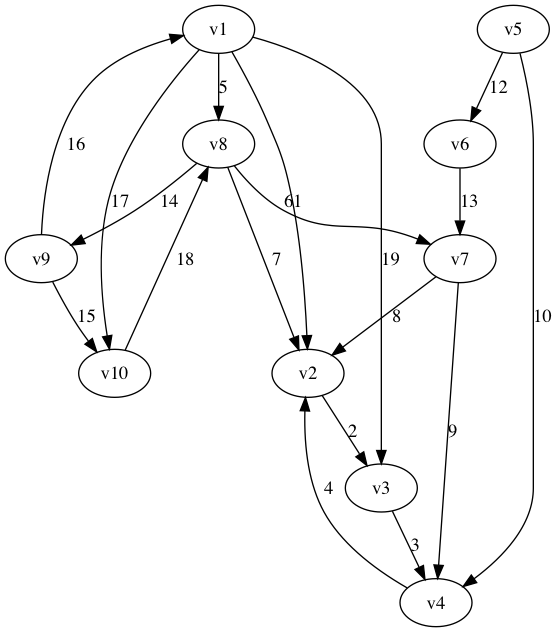

In [1]:
import pydotplus
from IPython.display import Image
graph = pydotplus.graphviz.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')
Image(graph.create_png())